In [3]:
import pandas as pd
import pylab as pl

#  os dados completos foram retirados de http://download.inep.gov.br/microdados/microdados_enem_2019.zip
#  os arquivo csv usado é uma amostra do arquivo completo.

#  fonte = "/content/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [6]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24



---


Desafio 01: Fazer a proporção de inscritos por idade.


Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.


---



In [87]:
# Desafio 01
((dados['NU_IDADE'].value_counts()/dados['NU_IDADE'].count())*100).sort_index()

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [88]:
# correção do desafio 01 - uso de normalize=True
dados['NU_IDADE'].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

In [89]:
# Desafio 02
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

SP    1
BA    1
MT    1
AP    1
Name: SG_UF_RESIDENCIA, dtype: int64

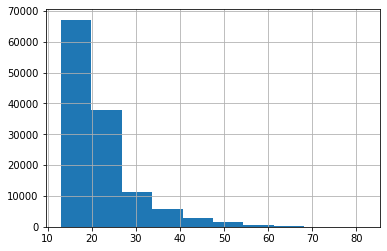

In [90]:
#  Visualização
dados['NU_IDADE'].hist()



---
Desafio 03: Colocar o título no gráfico


---




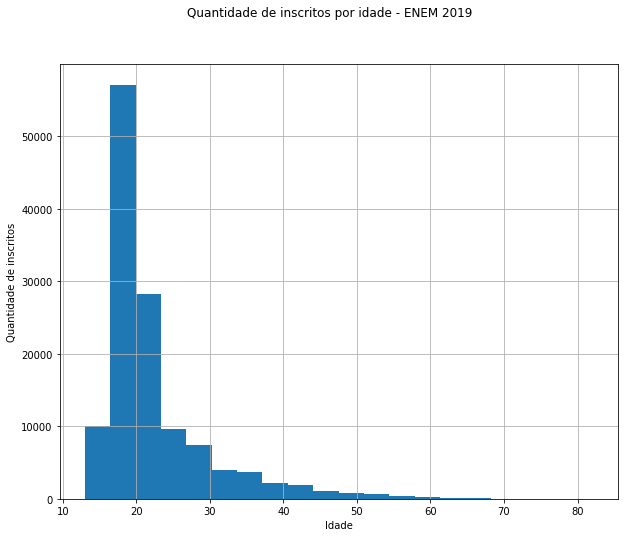

In [19]:
#  Desafio 03
pl.suptitle("Quantidade de inscritos por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos')
dados['NU_IDADE'].hist(bins = 20, figsize = (10,8))

In [20]:
#  trabalhar com os treineiros
dados['IN_TREINEIRO']

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [21]:
#  faz uma consulta com a condição que a coluna IN_TREINEIRO == 1 (ou seja, quando os inscritos são treineiros)
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64



---
Desafio 04: Plotar os histogramas das idades dos treineiros e não treineiros


---




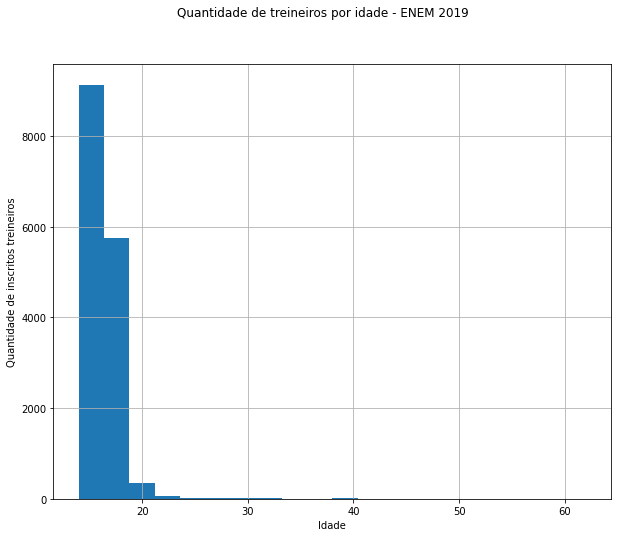

In [22]:
#  Desafio 04
pl.suptitle("Quantidade de treineiros por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos treineiros')
dados.query("IN_TREINEIRO == 1")['NU_IDADE'].hist(bins = 20, figsize = (10,8))

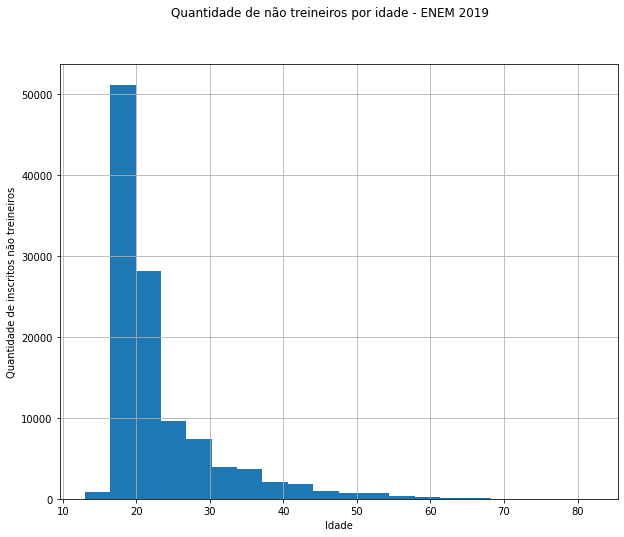

In [23]:
#  cont. Desafio 04
pl.suptitle("Quantidade de não treineiros por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos não treineiros')
dados.query("IN_TREINEIRO == 0")['NU_IDADE'].hist(bins = 20, figsize = (10,8))

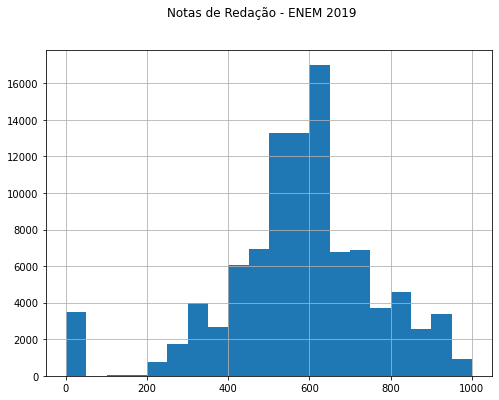

In [24]:
#  Histograma das notas de redação
pl.suptitle("Notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].hist(bins = 20, figsize = (8, 6))

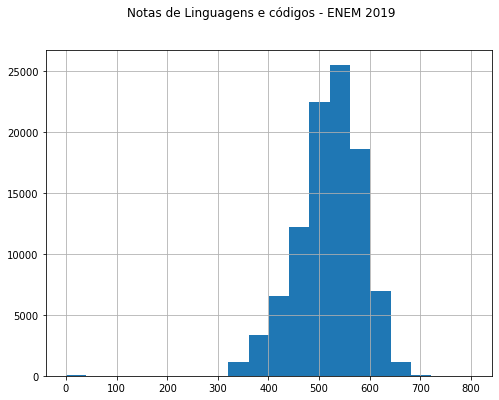

In [25]:
#  Histograma das notas de Linguagens e códigos
pl.suptitle("Notas de Linguagens e códigos - ENEM 2019")
dados['NU_NOTA_LC'].hist(bins = 20, figsize = (8, 6))

In [26]:
#  calcula a média do valor de uma coluna
pl.suptitle("Média das notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

<Figure size 432x288 with 0 Axes>

In [27]:
#  calcula o desvio padrão de uma coluna
pl.suptitle("Desvio padrão das notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].std()

188.07645455749753

<Figure size 432x288 with 0 Axes>

In [28]:
#  Variável (lista) para armazenar apenas os nomes das colunas que serão usadas para o describe
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].describe()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [29]:
#  verifica a nota máximo dos 90% (0.9 do parâmetro) dos inscritos. Na verdade, o que se quer saber é qual o limite para os 10% com notas
#  mais altas.
dados["NU_NOTA_LC"].quantile(0.9)

596.3

In [31]:
#  verifica a nota dos 10% dos inscritos com nota mais baixa.
dados["NU_NOTA_LC"].quantile(0.1)

434.5

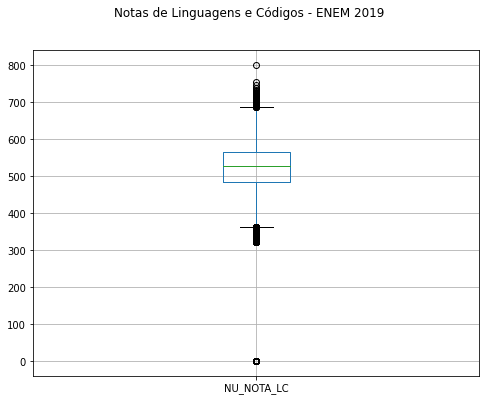

In [32]:
#  gráfico boxpot - diferenciar um valor único com base na média. 
#  A leitura do grafíco:
  #  A linha verde no retângulo é a mediana
  #  A maioria dos inscritos está com notas entre os 480 e 550 (retângulo no centro do gráfico)
  #  A bolinhas nos extremos são pessoas que tiraram as notas apontadas, mas que não estão entre a maioria
  #  os traços pretos são os quartis 25 e 75
pl.suptitle("Notas de Linguagens e Códigos - ENEM 2019")
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

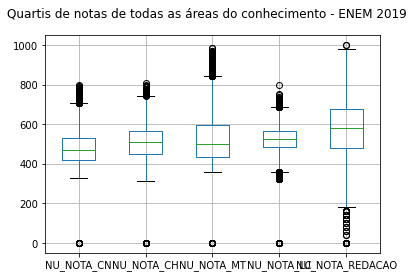

In [33]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - ENEM 2019")
dados[provas].boxplot(grid = True, figsize = (10,8))



---
Desafio 05: Comparar as distribuições das provas de inglês (TP_LINGUA == 0) e de espanhol (TP_LINGUA == 1)

Desafio 06: Explorar a documentação do matplotlib e Pandas


---





In [34]:
# Desafio 05
# notas quando a língua estrangeira é o Inglês
dados.query("TP_LINGUA == 0")[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,46104.000000,48447.000000,46104.000000,48447.000000,48447.000000
mean,497.740194,528.271697,552.991077,537.679732,605.044688
std,79.823594,84.012277,117.326959,63.536275,186.388480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.100000,471.200000,455.500000,502.600000,520.000000
50%,496.900000,536.500000,540.100000,545.500000,600.000000
75%,557.400000,588.200000,638.700000,581.500000,720.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


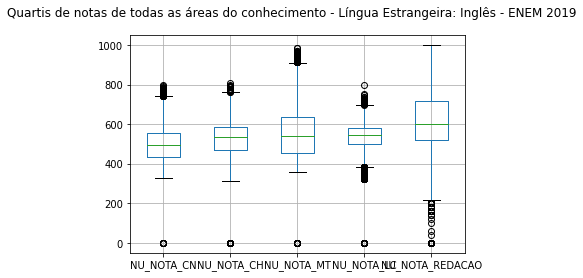

In [35]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - Língua Estrangeira: Inglês - ENEM 2019")
dados.query("TP_LINGUA == 0")[provas].boxplot(grid = True, figsize = (10,8))

In [36]:
# cont. Desafio 05
# notas quando a língua estrangeira é o Espanhol
dados.query("TP_LINGUA == 1")[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,46654.000000,49596.000000,46654.000000,49596.000000,49596.000000
mean,458.420976,486.944455,494.466352,503.646965,538.870877
std,67.145864,76.623116,92.181696,61.016081,183.921283
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,407.300000,432.100000,422.600000,468.800000,460.000000
50%,450.400000,487.700000,474.300000,509.700000,560.000000
75%,503.900000,542.100000,551.000000,545.200000,640.000000
max,769.900000,760.400000,932.500000,718.400000,1000.000000


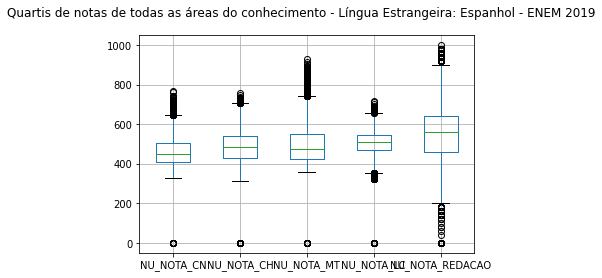

In [37]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - Língua Estrangeira: Espanhol - ENEM 2019")
dados.query("TP_LINGUA == 1")[provas].boxplot(grid = True, figsize = (10,8))



---

**Aula 02**


---



In [38]:
#  Quantidade de adolescentes menores de 15 anos por gênero 
dados.query("NU_IDADE <= 14")["TP_SEXO"].value_counts()

F    96
M    49
Name: TP_SEXO, dtype: int64

In [39]:
#  Quantidade de adolescentes menores de 15 anos por UF
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
SP    11
MG    11
MA     9
PI     7
PB     7
GO     7
MT     4
AM     4
DF     4
SE     3
PR     3
TO     3
SC     2
RO     2
AL     2
ES     1
AP     1
RS     1
RN     1
AC     1
MS     1
RJ     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [40]:
#  Quantidade de adolescentes menores de 15 anos por UF
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
SP    0.075862
MG    0.075862
MA    0.062069
PI    0.048276
PB    0.048276
GO    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
SC    0.013793
RO    0.013793
AL    0.013793
ES    0.006897
AP    0.006897
RS    0.006897
RN    0.006897
AC    0.006897
MS    0.006897
RJ    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

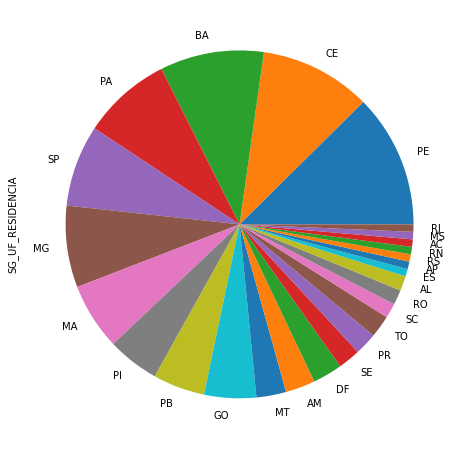

In [41]:
#  Quantidade de adolescentes menores de 15 anos por UF (não usar um gráfico de pizza, pois a visualização não é boa)
alunos_menor_quinze = dados.query("NU_IDADE <= 14")
alunos_menor_quinze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(10,8))

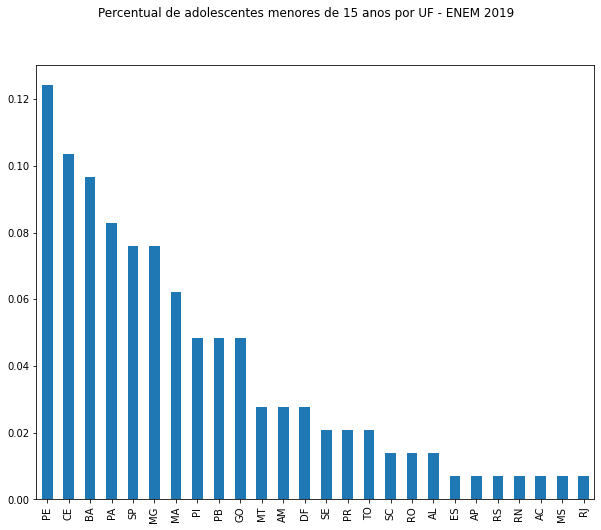

In [42]:
pl.suptitle("Percentual de adolescentes menores de 15 anos por UF - ENEM 2019")
alunos_menor_quinze["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [43]:
#  DESAFIO DO GUI: Aumentar a amostra para alunos menores de idade (até 17 anos) e comparar a proporção por UF

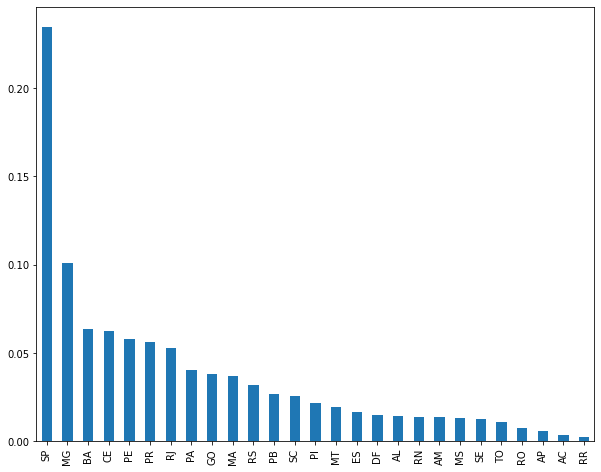

In [44]:
alunos_menor_idade = dados.query("NU_IDADE < 18")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [ ]:
#  FIM DO DESAFIO DO GUI: SP apresenta o maior número de inscritos menores de 18 anos, quase o dobro de MG.

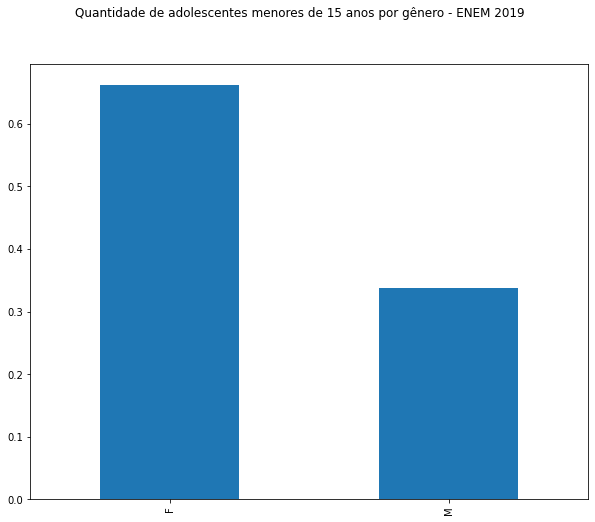

In [45]:
# DESAFIO EXTRA: 
pl.suptitle("Quantidade de adolescentes menores de 15 anos por gênero - ENEM 2019")
alunos_menor_quinze["TP_SEXO"].value_counts(normalize=True).plot.bar(figsize=(10,8))
#  dados.query("NU_IDADE <= 14")["TP_SEXO"].value_counts().plot.bar(figsize=(10,8))

In [46]:
#  Quantidades de pessoas que fazem a prova em UF diferente da própria residência
dados.query("SG_UF_RESIDENCIA != SG_UF_PROVA")["SG_UF_RESIDENCIA"].value_counts()

MG    160
BA    144
MA     88
GO     81
PB     75
PA     68
SP     58
PE     52
AL     50
PR     45
PI     45
CE     45
TO     42
RN     39
RJ     38
ES     32
MT     27
RS     24
MS     23
DF     20
RO     17
SC     17
AM     12
SE      8
AC      6
AP      3
RR      3
Name: SG_UF_RESIDENCIA, dtype: int64

In [47]:
len(alunos_menor_quinze)

145

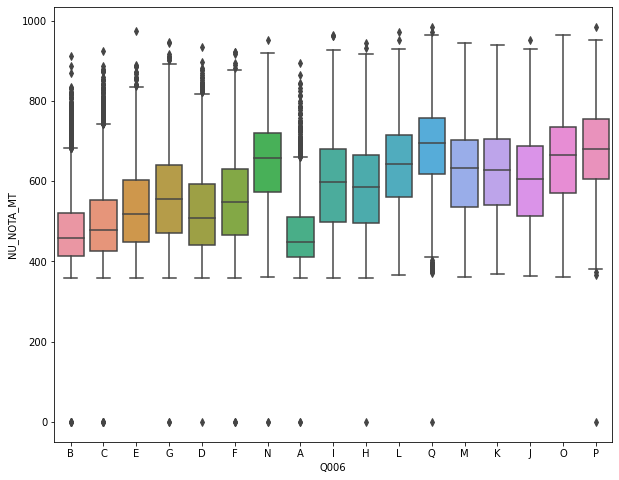

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt # para manipular tamanho, label, títulos e cores dos gráficos

plt.figure(figsize=(10,8))
# relação de renda familiar (Q006) com as notas de matemática (NU_NOTA_MT)
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados)

In [49]:
# para ordenar o eixo X
faixa_renda_ordenada = dados["Q006"].unique()
faixa_renda_ordenada.sort()
print(faixa_renda_ordenada)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


Text(0.5, 1.0, 'Relação renda familiar e notas de matemática - ENEN 2019')

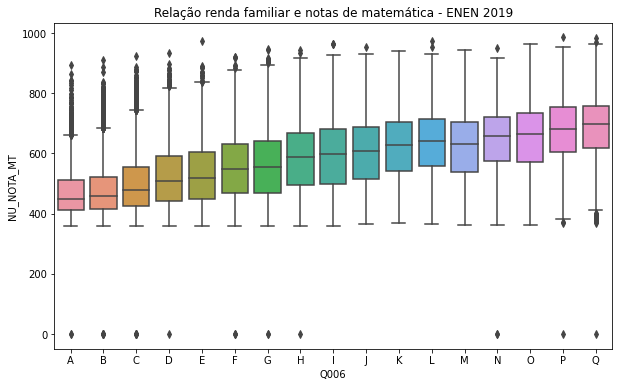

In [50]:
plt.figure(figsize=(10,6))
# relação de renda familiar (Q006) com as notas de matemática (NU_NOTA_MT)
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = faixa_renda_ordenada)
plt.title("Relação renda familiar e notas de matemática - ENEN 2019")

In [51]:
# soma das notas para plotar um gráfico com a nota total X renda familiar
# para isso, vamos usar a variável que armazena o nome das colunas de notas apenas para facilitar o uso do df
# para somar as linhas (as notas de cada inscrito) é necessário usar o axis, que significa eixo. axis = 0 (Eixo Coluna) e axis = 1 (Eixo Linha)
dados[provas].sum(axis=1)

0         2288.9
1         1184.6
2         2350.5
3         2555.7
4         2803.5
           ...  
127375    2867.4
127376    2218.5
127377    1453.9
127378    2573.9
127379    2287.8
Length: 127380, dtype: float64

In [52]:
# adicionar essa soma em uma coluna nova no df
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Relação renda familiar e notas totais - ENEN 2019')

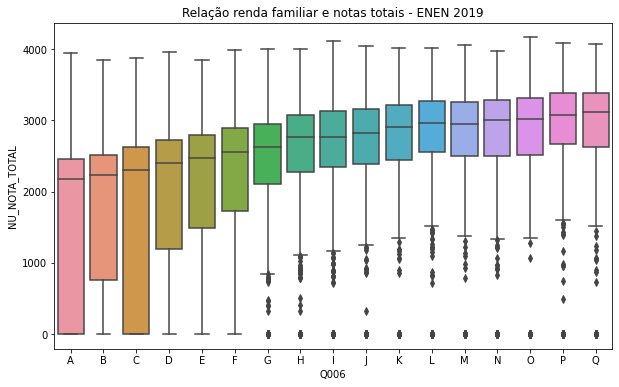

In [53]:
plt.figure(figsize=(10,6))
# relação de renda familiar (Q006) com a nota total (NU_NOTA_TOTAL)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = faixa_renda_ordenada)
plt.title("Relação renda familiar e notas totais - ENEN 2019")

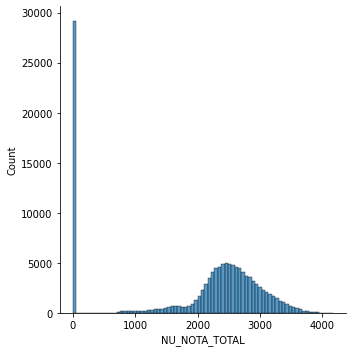

In [54]:
sns.displot(dados, x = "NU_NOTA_TOTAL")

In [55]:
# inclusão da coluna NU_NOTA_TOTAL na lista de cabeçalhos
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


É possível verificar que a quantidade de notas zero destoa o gráfico. Essas notas zeradas podem ser por causa de ausência dos inscritos em todos ou pelo menos um dia das provas.

In [56]:
dados.query("TP_PRESENCA_CN == 1 and TP_PRESENCA_CH == 1 and TP_PRESENCA_LC == 1 and TP_PRESENCA_MT == 1")["NU_NOTA_TOTAL"]

0         2288.9
2         2350.5
3         2555.7
4         2803.5
5         3301.4
           ...  
127373    2373.9
127375    2867.4
127376    2218.5
127378    2573.9
127379    2287.8
Name: NU_NOTA_TOTAL, Length: 92539, dtype: float64

In [57]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Relação renda familiar e notas totais (Sem notas zeradas) - ENEN 2019')

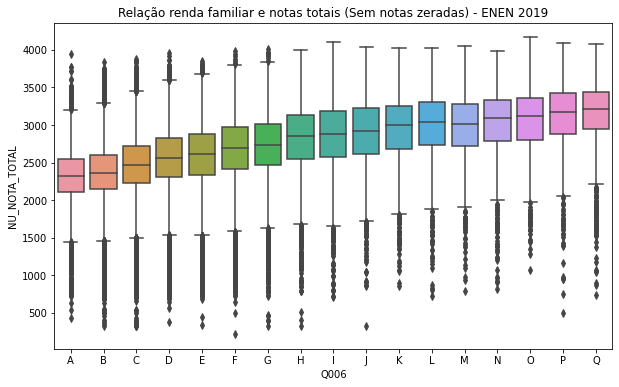

In [58]:
plt.figure(figsize=(10,6))
# relação de renda familiar (Q006) com nota total (NU_NOTA_TOTAL)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = faixa_renda_ordenada)
plt.title("Relação renda familiar e notas totais (Sem notas zeradas) - ENEN 2019")

Text(0.5, 1.0, 'Relação renda familiar e notas totais (Sem notas zeradas) - ENEN 2019')

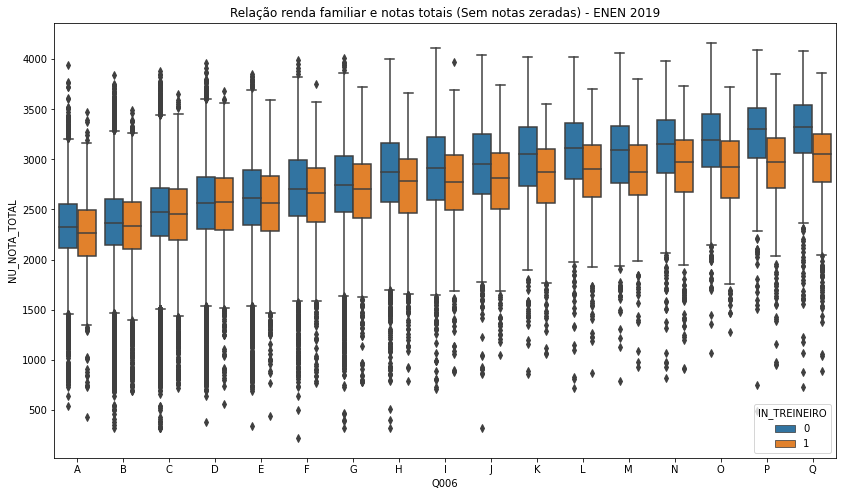

In [59]:
plt.figure(figsize=(14,8))
# relação de renda familiar (Q006) com nota total (NU_NOTA_TOTAL)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, hue="IN_TREINEIRO", order = faixa_renda_ordenada)
plt.title("Relação renda familiar e notas totais (Sem notas zeradas) - ENEN 2019")



---
# Desafios

MEGA DESAFIO DA THAINÁ: Pegar o arquivo completo dos alunos de 13 e 14 anos:
  - percentual por UF

Desafio do Gui: Aumentar a amostra para alunos menores de idade (até 17 anos) e comparar a proporção por UF

Desafio 03: Criar uma função para plotar o boxplot do seanborn

Desafio 04: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 05: Quem é eliminado tira zero ou será NaN - Not a umber (Não teve registro de notas)

Desafio 06: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro. (Tem mais treineiros na faixa de pessoas com rendas mais altas?)

Desafio 07: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia) (Verificar se as notas variam com relação ao uso de internet ou não - pessoas que tem acesso a internet com relação a nota (Q025).

---




In [61]:
#  MEGA DESAFIO DA THAINÁ
fonte_completa = "/content/MICRODADOS_ENEM_2019.csv"

dados_comp = pd.read_csv(fonte_completa)
dados_comp.head()

FileNotFoundError: ignored

In [62]:
#  Continuação MEGA DESAFIO DA THAINÁ
#  Quantidade de adolescentes menores de 15 anos por UF (não usar um gráfico de pizza, pois a visualização não é boa)
alunos_menor_quinze_comp = dados_comp.query("NU_IDADE <= 14")
pl.suptitle("Percentual de adolescentes menores de 15 anos por UF - ENEM 2019")
alunos_menor_quinze_comp["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

NameError: ignored

In [76]:
#  Desafio 03: Criar uma função para plotar o boxplot do seanborn
def plotarGrafico(titulo, x, y, df, ordenacao, matiz):
  plt.figure(figsize=(14,8))
  # relação de renda familiar (Q006) com nota total (NU_NOTA_TOTAL)
  sns.boxplot(x=x, y = y, data =df, order = ordenacao, hue = matiz)
  plt.title(titulo)

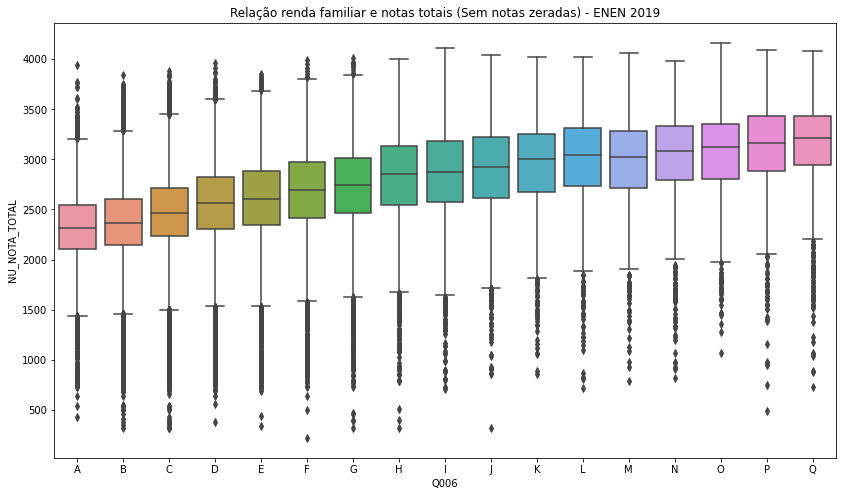

In [78]:
titulo = "Relação renda familiar e notas totais (Sem notas zeradas) - ENEN 2019"
X = "Q006"
Y = "NU_NOTA_TOTAL"
matiz = None
plotarGrafico(titulo,
              X,
              Y,
              dados_sem_notas_zero,
              faixa_renda_ordenada,
              matiz)

In [79]:
#  DESAFIO 04: Verificar se quem zerou a prova foi eliminado ou não estava presente

#dados.query("(TP_PRESENCA_CN == 1 or TP_PRESENCA_CH == 1 or TP_PRESENCA_LC == 1 or TP_PRESENCA_MT == 1) and NU_NOTA_TOTAL == 0")[provas]
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
dados.query("NU_NOTA_TOTAL == 0")[presenca].value_counts()

TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT
0               0               0               0                 28998
                2               2               0                   120
                1               1               0                    39
1               0               0               1                     3
                1               1               1                     2
dtype: int64

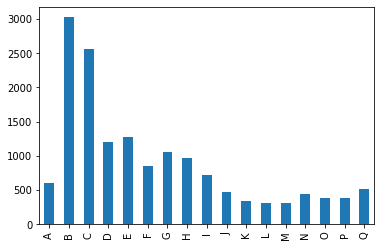

In [80]:
# DESAFIO 06: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro. (Tem mais treineiros na faixa de pessoas com rendas mais altas?)
# relação de renda familiar (Q006) com treineiros (IN_TREINEIRO)
dados.query("IN_TREINEIRO == 1")["Q006"].value_counts().sort_index().plot.bar()



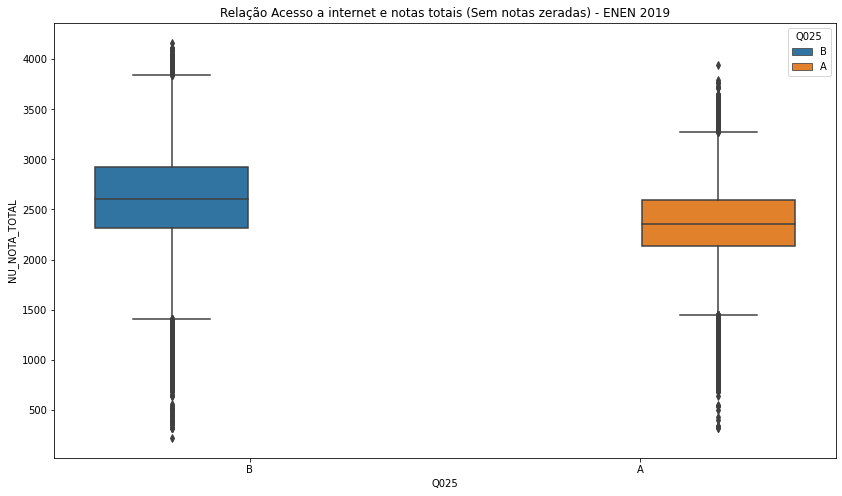

In [86]:
''' Desafio 07: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão 
    sobre o assunto e o contexto de pandemia) (Verificar se as notas variam com relação ao uso de internet 
    ou não - pessoas que tem acesso a internet com relação a nota (Q025).
'''
titulo = "Relação Acesso a internet e notas totais (Sem notas zeradas) - ENEN 2019"
X = "Q025"
Y = "NU_NOTA_TOTAL"
plotarGrafico(titulo,
              X,
              Y,
              dados_sem_notas_zero,
              None, 
              X)

É possível perceber que há uma diferença nas notas: as notas são mais altas quando os inscritos têm acesso à internet.
A - sem acesso na residência. B - com acesso na residência.